In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn import metrics
%matplotlib inline

In [2]:
telegramData = pd.read_csv("cleanedTelegram.txt", header=None)
telegramData.head()

,0
0,LOADING ALL APPLE PAY USERS RN LIVE PROOF HIT ...
1,Legit drop on unverified cashapps too
2,Hmu HMU if ya need PayPal logs GET YOUR MONE...
3,Never be a loser keep fighting till you become...
4,Yall gotta know that there is know one that w...


In [3]:
telegramData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888385 entries, 0 to 9888384
Data columns (total 1 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   0       object
dtypes: object(1)
memory usage: 75.4+ MB


In [4]:
redditData = pd.read_csv("cleanedReddit.txt", header=None)
redditData.head()

,0
0,Should patients Twiiter their surgery Should h...
1,httpselectnytimescomgstabstracthtmlresF00A11F...
2,httpselectnytimescomgstabstracthtmlresF60F13F...
3,httppqasbpqarchivercomchicagotribuneaccess508...
4,httpselectnytimescomgstabstracthtmlresFB0E11F...


In [5]:
redditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797121 entries, 0 to 797120
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       797121 non-null  object
dtypes: object(1)
memory usage: 6.1+ MB


In [6]:
#merge both dataframes
all_data = pd.concat([telegramData, redditData], ignore_index=True)
all_data.head()

,0
0,LOADING ALL APPLE PAY USERS RN LIVE PROOF HIT ...
1,Legit drop on unverified cashapps too
2,Hmu HMU if ya need PayPal logs GET YOUR MONE...
3,Never be a loser keep fighting till you become...
4,Yall gotta know that there is know one that w...


In [7]:
#remove numerical values
all_data[0] = all_data[0].str.replace('\d+', '')
all_data.head()

,0
0,LOADING ALL APPLE PAY USERS RN LIVE PROOF HIT ...
1,Legit drop on unverified cashapps too
2,Hmu HMU if ya need PayPal logs GET YOUR MONE...
3,Never be a loser keep fighting till you become...
4,Yall gotta know that there is know one that w...


In [8]:
#td-idf vectorize
data = all_data[0].values
vectorizer = TfidfVectorizer(strip_accents='unicode', stop_words='english', min_df=2) # Corpus is in English
X = vectorizer.fit_transform(data)
print(X.shape)

(10685506, 251911)


In [9]:
word_features = vectorizer.get_feature_names_out()
print(len(word_features))
print(word_features[5000:5100])

251911
['airframe' 'airgt' 'airgti' 'airguitaring' 'airgun' 'airhead' 'airheads'
 'airhes' 'airhorn' 'airhorns' 'airhow' 'airhttpwwwadobecomproductsair'
 'airi' 'airif' 'airim' 'airing' 'airit' 'airits' 'airjust' 'airless'
 'airlift' 'airlifted' 'airlifts' 'airline' 'airliner' 'airliners'
 'airlines' 'airlock' 'airman' 'airmans' 'airmen' 'airmiles' 'airmy'
 'airnah' 'airno' 'airor' 'airplane' 'airplanes' 'airplanesthe'
 'airplanetheres' 'airplay' 'airpod' 'airpodiphone' 'airpods' 'airport'
 'airportairplane' 'airportgt'
 'airporthttpenwikipediaorgwikiyasserarafatinternationalairport'
 'airporti' 'airports' 'airportthe' 'airportwow' 'airpower' 'airpowered'
 'airpro' 'airquality' 'airquotes' 'airraiding' 'airs' 'airship'
 'airships' 'airshit' 'airshow' 'airso' 'airsoft' 'airsofts' 'airspace'
 'airspeed' 'airstream' 'airstrike' 'airstrikes' 'airstrip' 'airthats'
 'airthe' 'airthis' 'airtight' 'airtime' 'airto' 'airtoair' 'airtoground'
 'airtraffic' 'airtran' 'airtrans' 'airwalks' 'airwate

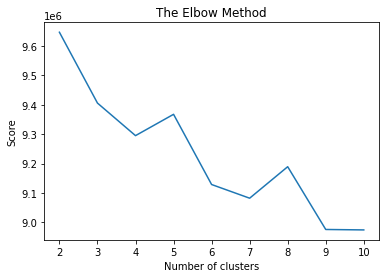

In [11]:
#elbow method
score = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    score.append(kmeans.inertia_)
    
plt.plot(range(2,11), score)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.savefig('elbow.png')
plt.show()

In [14]:
print(word_features[250:300])

['abetted' 'abetting' 'abettor' 'abettors' 'abeyance' 'abg' 'abgesehen'
 'abh' 'abhi' 'abhor' 'abhore' 'abhored' 'abhorred' 'abhorrence'
 'abhorrent' 'abhorring' 'abhors' 'abhorsen' 'abhrams' 'abi' 'abidal'
 'abide' 'abided' 'abides' 'abideth' 'abiding' 'abigail' 'abiilty'
 'abilene' 'abilify' 'abilita' 'abilitato' 'abilities' 'abilitiesactually'
 'abilitiesi' 'abilitiesim' 'ability' 'abilityi' 'abilitythe'
 'abilitywell' 'abilityyou' 'abillity' 'abilmente' 'abilty' 'abinadi'
 'abingdon' 'abinitio' 'abiogenesis'
 'abiogenesishttpenwikipediaorgwikiabiogenesis' 'abiogenic']


In [28]:
kmeans = KMeans(n_clusters = 3, n_init = 20)
kmeans.fit(X)
label = kmeans.fit_predict(X)
# print(label)

common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]

for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(word_features[word] for word in centroid))

0 : method, methods, transfer, cards, new, bank, paypal, sauce, fullz, pros, credit, dl, website, buy, ssn, pm, free, dm, account, dont, available, directly, cashout, card, admin
1 : balance, high, dumps, ccs, low, logslow, httpshit, proofs, available, paypal, btc, maximum, fresh, fullz, clones, price, cc, card, goes, rates, account, cards, logs, cloned, bank
2 : logs, bank, paypal, suntrust, chase, cashapp, citi, huntington, woodforest, cheap, chime, nfcu, buy, pnc, bbva, prices, welsfargo, legit, shopwithscrip, wellsfargo, affordable, available, uk, canada, boa


In [29]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(label, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(label, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(label, kmeans.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(label, kmeans.labels_))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, kmeans.labels_, sample_size=1000))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand-Index: 1.000
Silhouette Coefficient: 0.049
